Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Treatment = col_character(),
  sobs = col_integer(),
  chao = col_double(),
  chao_lci = col_double(),
  chao_hci = col_double(),
  ace = col_double(),
  ace_lci = col_double(),
  ace_hci = col_double(),
  jackknife = col_integer(),
  jackknife_lci = col_integer(),
  jackknife_hci = col_integer(),
  bootstrap = col_double()
)


Sample_ID,Treatment,sobs,chao,chao_lci,chao_hci,ace,ace_lci,ace_hci,jackknife,jackknife_lci,jackknife_hci,bootstrap
F3D0,Early,34,34,34,0,34.24894,34.01504,38.12091,0,0,0,34.38718
F3D1,Early,31,31,31,31,31.00000,31.00000,31.00000,31,31,31,31.19633
F3D2,Early,36,36,36,0,36.24354,36.01553,39.81911,0,0,0,36.53178
F3D3,Early,33,33,33,33,33.00000,33.00000,33.00000,33,33,33,33.72031
F3D6,Early,32,32,32,0,32.22763,32.01391,35.72389,0,0,0,32.44697
F3D8,Early,33,33,33,33,33.00000,33.00000,33.00000,33,33,33,33.45639


[1] 15 13

Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Treatment = col_character()
)


Sample_ID,Treatment
F3D0,Early
F3D1,Early
F3D2,Early
F3D3,Early
F3D6,Early
F3D8,Early


[1] 15  2

Sample_ID,Treatment,Alpha_Index,Alpha_Value
F3D0,Early,sobs,34
F3D1,Early,sobs,31
F3D2,Early,sobs,36
F3D3,Early,sobs,33
F3D6,Early,sobs,32
F3D8,Early,sobs,33


Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Treatment = col_character(),
  bergerparker = col_double(),
  shannon = col_double(),
  shannon_lci = col_double(),
  shannon_hci = col_double(),
  npshannon = col_double(),
  simpson = col_double(),
  simpson_lci = col_double(),
  simpson_hci = col_double(),
  invsimpson = col_double(),
  invsimpson_lci = col_double(),
  invsimpson_hci = col_double()
)


Sample_ID,Treatment,bergerparker,shannon,shannon_lci,shannon_hci,npshannon,simpson,simpson_lci,simpson_hci,invsimpson,invsimpson_lci,invsimpson_hci
F3D0,Early,0.392736,2.472430,2.431434,2.513427,2.473363,0.177627,0.167433,0.187822,5.629762,5.324195,5.972539
F3D1,Early,0.289986,2.581503,2.551012,2.611993,2.582366,0.122784,0.116719,0.128849,8.144369,7.761010,8.567568
F3D2,Early,0.244603,2.626755,2.606219,2.647291,2.627485,0.108074,0.104863,0.111284,9.252959,8.986033,9.536228
F3D3,Early,0.307721,2.406942,2.358791,2.455094,2.411636,0.152024,0.143298,0.160749,6.577917,6.220874,6.978440
F3D6,Early,0.244320,2.473851,2.435368,2.512333,2.475282,0.136820,0.130528,0.143111,7.308893,6.987584,7.661174
F3D8,Early,0.313690,2.539686,2.494464,2.584907,2.542652,0.137020,0.127970,0.146070,7.298210,6.846040,7.814334


[1] 15 13

Parsed with column specification:
cols(
  Sample_ID = col_character(),
  Treatment = col_character()
)


Sample_ID,Treatment
F3D0,Early
F3D1,Early
F3D2,Early
F3D3,Early
F3D6,Early
F3D8,Early


[1] 15  2

Sample_ID,Treatment,Alpha_Index,Alpha_Value
F3D0,Early,bergerparker,0.392736
F3D1,Early,bergerparker,0.289986
F3D2,Early,bergerparker,0.244603
F3D3,Early,bergerparker,0.307721
F3D6,Early,bergerparker,0.244320
F3D8,Early,bergerparker,0.313690


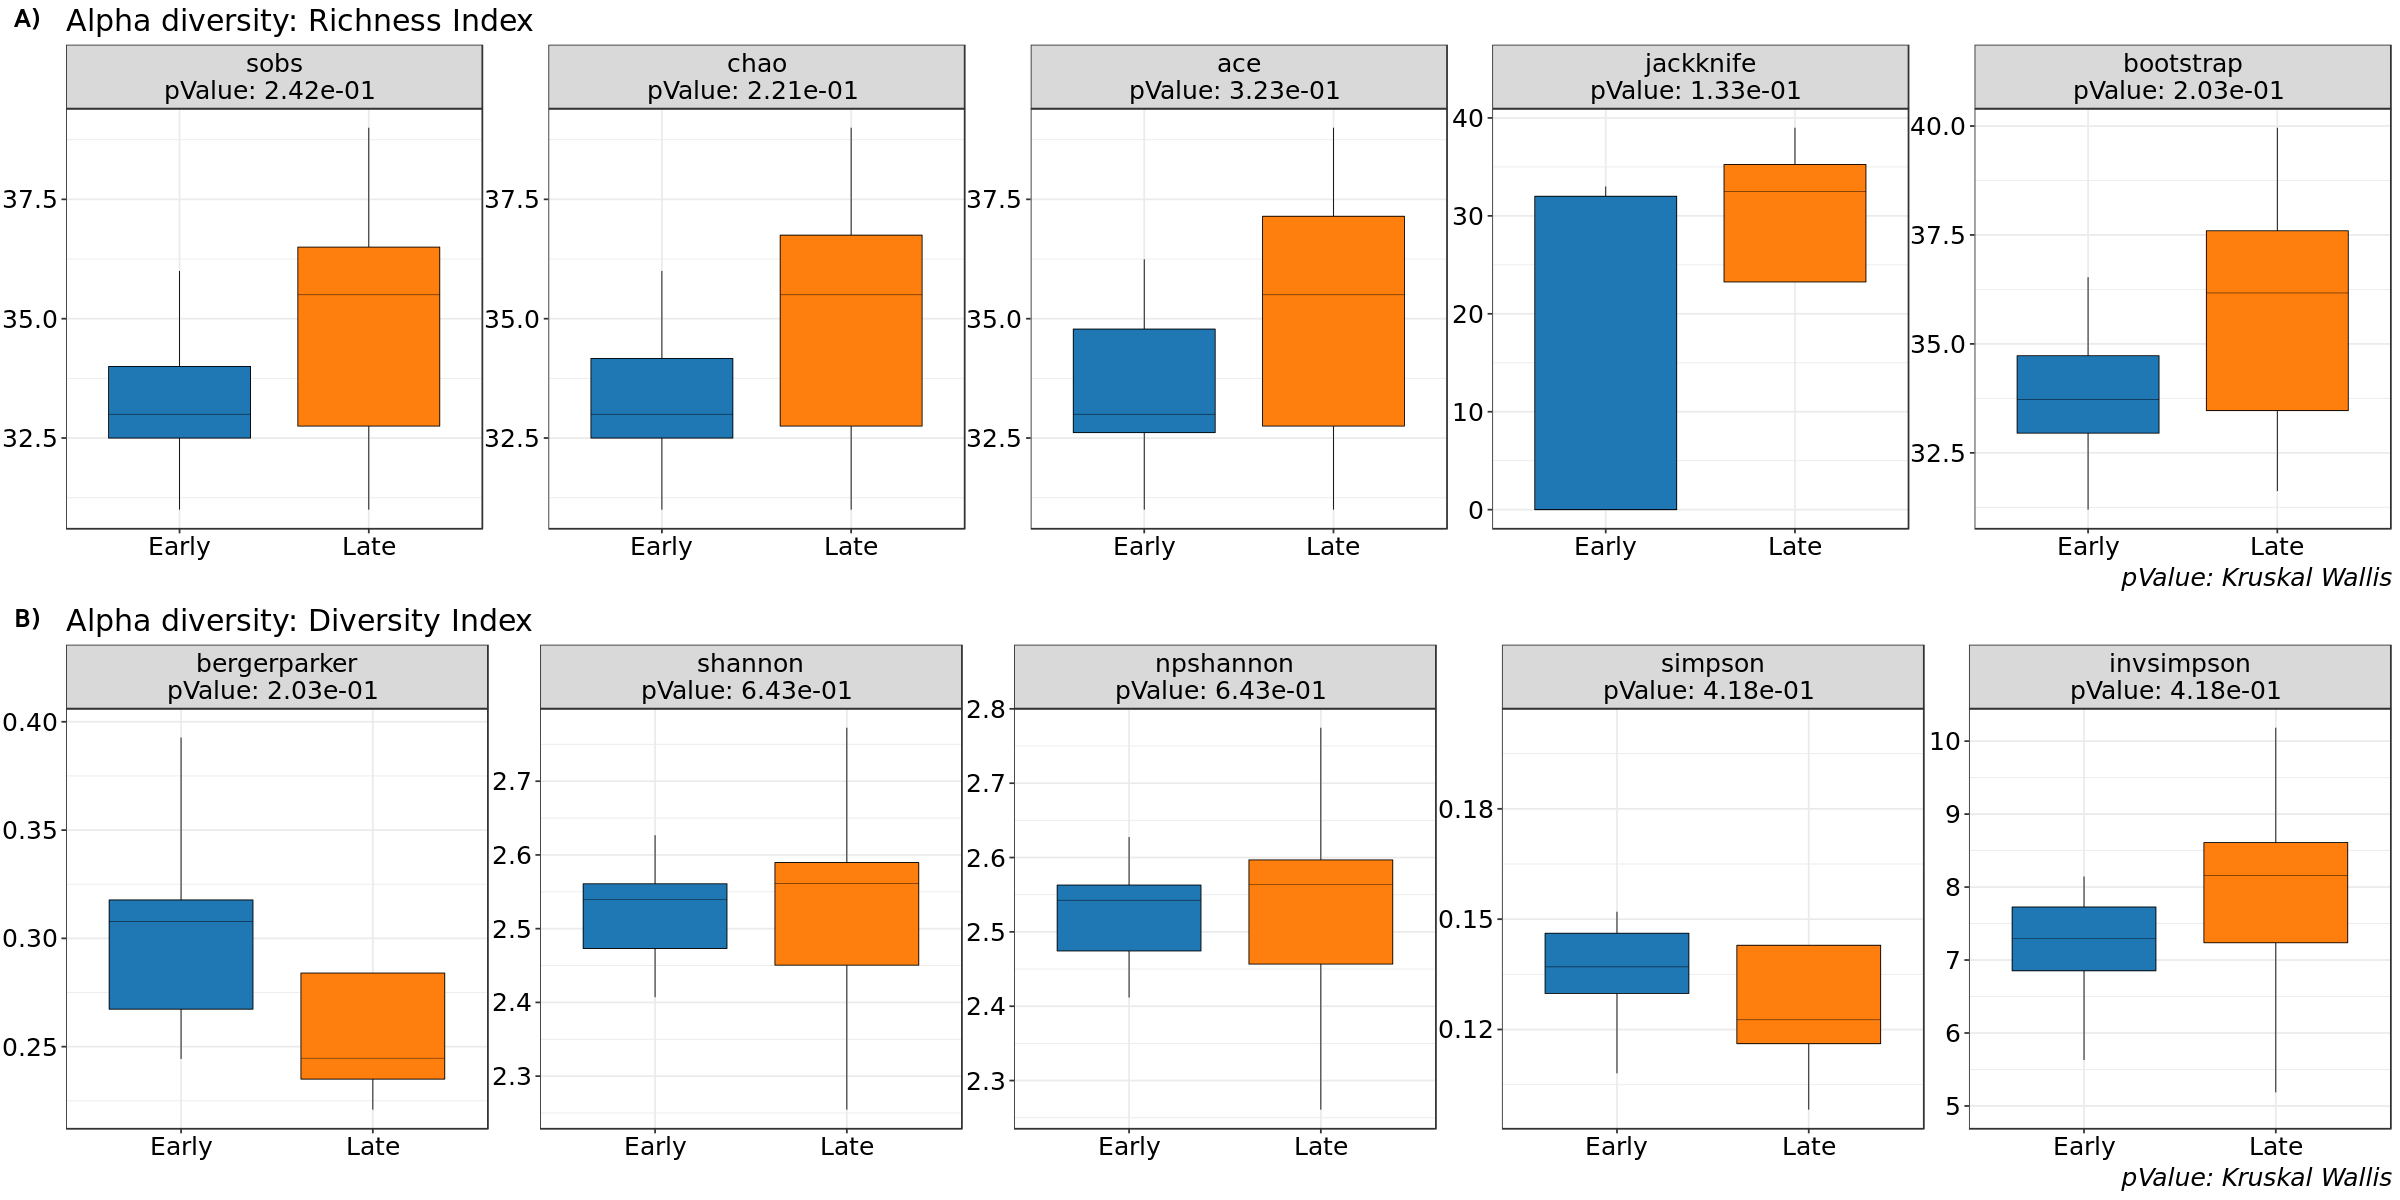

In [11]:
#####################
# Data Loading
#####################
library(tidyverse)
library(ggplot2)
library(reshape2)
library(cowplot)
library(tools)
library(scales)
library(stringr)
library(gtools)
######################
#SETTING
args = commandArgs(trailingOnly=TRUE)
options(scipen=10000000)
Default_Color = c('#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf')
theme_set(theme_bw())
options(repr.plot.width=20, repr.plot.height=10)
######################
#INPUT/OUTPUT
#alpha_diversity_file_Path = args[1]
alpha_diversity_file_Path = "/data/shamsaddinisha/MBAC/Biominer/MISEQ/MISEQ_SOP/downstream/Early_VS_Late/uparse/alpha_diversity/MISEQ_SOP.Early_VS_Late.uparse.alpha_diversity.richness.txt"
#metadata_file_Path = args[2]
metadata_file_Path = "/data/shamsaddinisha/MBAC/Biominer/MISEQ/MISEQ_SOP/downstream/Early_VS_Late/uparse/feature_selection/MISEQ_SOP.Early_VS_Late.uparse.feature_selection.mothur_metadata.txt"
#alpha_diversity_plot_Patterns = args[3]
alpha_diversity_plot_Patterns = "./MISEQ_SOP.Early_Late.uparse.alpha_diversity.txt"
#####################
#READ I/O
alpha_diversity_DF = read_tsv(alpha_diversity_file_Path)
head(alpha_diversity_DF)
dim(alpha_diversity_DF)
metadata_DF = read_tsv(metadata_file_Path)
head(metadata_DF)
dim(metadata_DF)
the_Method = "richness"
####################
#Data Wrangling
colnames(alpha_diversity_DF)[colnames(alpha_diversity_DF)=="group"] <- "Sample_ID"
annotation_List = c()
alpha_diversity_index_List = c("sobs", "chao", "ace", "jackknife", "bootstrap")
alpha_diversity_index_List_Length = length(alpha_diversity_index_List)
#
metadata_alpha_diversity_DF = metadata_DF %>% 
    left_join(alpha_diversity_DF, by = c("Sample_ID" = "Sample_ID"))
metadata_alpha_diversity_DF = alpha_diversity_DF
#head(metadata_richness_DF)
#
melted_metadata_alpha_diversity_DF = melt(metadata_alpha_diversity_DF, id.vars = c("Sample_ID", "Treatment"), variable.name = "Alpha_Index", value.name="Alpha_Value", measure.vars=alpha_diversity_index_List)
head(melted_metadata_alpha_diversity_DF)
#####################
#Data statistics
for(j in 1:alpha_diversity_index_List_Length){
    kw_test = kruskal.test(get(alpha_diversity_index_List[[j]]) ~ as.factor(Treatment), data=metadata_alpha_diversity_DF)
    statistic = kw_test$statistic
    parameter = kw_test$parameter
    p_value = kw_test$p.value
    sci_p_value = formatC(p_value, format = "e", digits = 2)
    sig_value = stars.pval(p_value)
    annotation_List[[alpha_diversity_index_List[[j]]]] = paste(alpha_diversity_index_List[[j]], "\n", "pValue: ",sci_p_value,sig_value, sep="" )
}
#####################
#Data Plotting
design_List = sort(unique(metadata_DF$Treatment))
design_list_Length = length(design_List)

#####################
#GGPLOT
richness_Object = ggplot(melted_metadata_alpha_diversity_DF, aes(x=Treatment, y=Alpha_Value, label=Treatment)) +
                geom_boxplot(aes(fill=Treatment), colour="black", outlier.shape=NA, size = 0.25, show.legend=TRUE, fatten = 0.5) +
                scale_fill_manual(breaks = c(design_List[[1]], design_List[[2]]), limits =c(design_List[[1]], design_List[[2]]), values=c('#1f77b4','#ff7f0e')) +
                scale_y_continuous()  +
                labs(title = "Alpha diversity: Richness Index", subtitle = NULL, caption = "pValue: Kruskal Wallis", tag = NULL, x=NULL, y=NULL) +
                theme(
                    #text=element_text(family="Sans"),
                    plot.title = element_text(size=18, color = "black", face = "plain" ),
                    plot.subtitle = element_text(size=10, color = "black", face = "plain" ),
                    plot.caption = element_text(size=15, color = "black", face = "italic"),
                    #X-AXIS
                    axis.title.x = element_text(size=15, color = "black", face = "plain"),
                    axis.text.x = element_text(size=15, color = "black", face = "plain"),
                    #Y-AXIS
                    axis.title.y = element_text(size=15, color = "black", face = "plain"),
                    axis.text.y = element_text(size=15, color = "black", face = "plain"),
                    #STRIP
                    strip.text.x = element_text(size=15, color = "black", face = "plain"),
                    #LEGEND
                    legend.position="none",
                ) +
                facet_wrap(~Alpha_Index, scales = "free_y", labeller = labeller(Alpha_Index = annotation_List, .default = label_parsed), nrow=1)

#####################
#EXPORTING
file_extension = file_ext(alpha_diversity_plot_Patterns)
#
plot_PDF = gsub(file_extension, "pdf", alpha_diversity_plot_Patterns)
plot_PNG = gsub(".pdf", ".png", plot_PDF)
plot_JPG = gsub(".pdf", ".jpg", plot_PDF)
plot_SVG = gsub(".pdf", ".svg", plot_PDF)
plot_TXT = gsub(".pdf", ".txt", plot_PDF)
#
#ggsave(file=plot_PDF, device=cairo_pdf, plot=ggplot_Object, width=15, height =5, units = "in", limitsize = FALSE, dpi=1200)
#ggsave(file=plot_PNG, device="png", plot=ggplot_Object, width=15, height =5, units = "in", limitsize = FALSE, dpi=300)
#ggsave(file=plot_JPG, device="jpg", plot=ggplot_Object, width=15, height =5, units = "in", limitsize = FALSE, dpi=300)
#ggsave(file=plot_SVG, device="svg", plot=ggplot_Object, width=15, height =5, units = "in", limitsize = FALSE, dpi=72)
#write_tsv(path=plot_TXT, x=metadata_alpha_diversity_DF)


###########################
######################
######################
#INPUT/OUTPUT
#alpha_diversity_file_Path = args[1]
alpha_diversity_file_Path = "/data/shamsaddinisha/MBAC/Biominer/MISEQ/MISEQ_SOP/downstream/Early_VS_Late/uparse/alpha_diversity/MISEQ_SOP.Early_VS_Late.uparse.alpha_diversity.diversity.txt"
#metadata_file_Path = args[2]
metadata_file_Path = "/data/shamsaddinisha/MBAC/Biominer/MISEQ/MISEQ_SOP/downstream/Early_VS_Late/uparse/feature_selection/MISEQ_SOP.Early_VS_Late.uparse.feature_selection.mothur_metadata.txt"
#alpha_diversity_plot_Patterns = args[3]
alpha_diversity_plot_Patterns = "./MISEQ_SOP.Early_Late.uparse.alpha_diversity.txt"
#####################
#READ I/O
alpha_diversity_DF = read_tsv(alpha_diversity_file_Path)
head(alpha_diversity_DF)
dim(alpha_diversity_DF)
metadata_DF = read_tsv(metadata_file_Path)
head(metadata_DF)
dim(metadata_DF)
the_Method = "diversity"
####################
#Data Wrangling
colnames(alpha_diversity_DF)[colnames(alpha_diversity_DF)=="group"] <- "Sample_ID"
annotation_List = c()
alpha_diversity_index_List = c("bergerparker", "shannon", "npshannon", "simpson", "invsimpson")
alpha_diversity_index_List_Length = length(alpha_diversity_index_List)
#
metadata_alpha_diversity_DF = metadata_DF %>% 
    left_join(alpha_diversity_DF, by = c("Sample_ID" = "Sample_ID"))
metadata_alpha_diversity_DF = alpha_diversity_DF
#head(metadata_richness_DF)
#
melted_metadata_alpha_diversity_DF = melt(metadata_alpha_diversity_DF, id.vars = c("Sample_ID", "Treatment"), variable.name = "Alpha_Index", value.name="Alpha_Value", measure.vars=alpha_diversity_index_List)
head(melted_metadata_alpha_diversity_DF)
#####################
#Data statistics
for(j in 1:alpha_diversity_index_List_Length){
    kw_test = kruskal.test(get(alpha_diversity_index_List[[j]]) ~ as.factor(Treatment), data=metadata_alpha_diversity_DF)
    statistic = kw_test$statistic
    parameter = kw_test$parameter
    p_value = kw_test$p.value
    sci_p_value = formatC(p_value, format = "e", digits = 2)
    sig_value = stars.pval(p_value)
    annotation_List[[alpha_diversity_index_List[[j]]]] = paste(alpha_diversity_index_List[[j]], "\n", "pValue: ",sci_p_value,sig_value, sep="" )
}
#####################
#Data Plotting
design_List = sort(unique(metadata_DF$Treatment))
design_list_Length = length(design_List)

#####################
#GGPLOT
diversity_Object = ggplot(melted_metadata_alpha_diversity_DF, aes(x=Treatment, y=Alpha_Value, label=Treatment)) +
                geom_boxplot(aes(fill=Treatment), colour="black", outlier.shape=NA, size = 0.25, show.legend=TRUE, fatten = 0.5) +
                scale_fill_manual(breaks = c(design_List[[1]], design_List[[2]]), limits =c(design_List[[1]], design_List[[2]]), values=c('#1f77b4','#ff7f0e')) +
                scale_y_continuous()  +
                labs(title = "Alpha diversity: Diversity Index", subtitle = NULL, caption = "pValue: Kruskal Wallis", tag = NULL, x=NULL, y=NULL) +
                theme(
                    #text=element_text(family="Sans"),
                    plot.title = element_text(size=18, color = "black", face = "plain" ),
                    plot.subtitle = element_text(size=10, color = "black", face = "plain" ),
                    plot.caption = element_text(size=15, color = "black", face = "italic"),
                    #X-AXIS
                    axis.title.x = element_text(size=15, color = "black", face = "plain"),
                    axis.text.x = element_text(size=15, color = "black", face = "plain"),
                    #Y-AXIS
                    axis.title.y = element_text(size=15, color = "black", face = "plain"),
                    axis.text.y = element_text(size=15, color = "black", face = "plain"),
                    #STRIP
                    strip.text.x = element_text(size=15, color = "black", face = "plain"),
                    #LEGEND
                    legend.position="none",
                ) +
                facet_wrap(~Alpha_Index, scales = "free_y", labeller = labeller(Alpha_Index = annotation_List, .default = label_parsed), nrow=1)

#####################
#EXPORTING
file_extension = file_ext(alpha_diversity_plot_Patterns)
#
plot_PDF = gsub(file_extension, "pdf", alpha_diversity_plot_Patterns)
plot_PNG = gsub(".pdf", ".png", plot_PDF)
plot_JPG = gsub(".pdf", ".jpg", plot_PDF)
plot_SVG = gsub(".pdf", ".svg", plot_PDF)
plot_TXT = gsub(".pdf", ".txt", plot_PDF)
#
#ggsave(file=plot_PDF, device=cairo_pdf, plot=ggplot_Object, width=15, height =5, units = "in", limitsize = FALSE, dpi=1200)
#ggsave(file=plot_PNG, device="png", plot=ggplot_Object, width=15, height =5, units = "in", limitsize = FALSE, dpi=300)
#ggsave(file=plot_JPG, device="jpg", plot=ggplot_Object, width=15, height =5, units = "in", limitsize = FALSE, dpi=300)
#ggsave(file=plot_SVG, device="svg", plot=ggplot_Object, width=15, height =5, units = "in", limitsize = FALSE, dpi=72)
#write_tsv(path=plot_TXT, x=metadata_alpha_diversity_DF)
#ggplot_Object
the_Plot =  plot_grid(richness_Object, diversity_Object, labels = c('A)', 'B)'), label_size = 14, ncol=1)                                    
#the_Plot = plot_grid(top_plot, feature_abundance_ggplot_Object, labels = c('', 'C)'), label_size = 14)
the_Plot
ggsave(file="./publication_alpha_diversity.pdf", device=cairo_pdf, plot=the_Plot, width=20, height =10, units = "in", limitsize = FALSE, dpi=1200)